In [ ]:
#importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score, homogeneity_score, completeness_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading Dataset into collab notebook

data = pd.read_csv("BostonHousing.csv")
data


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# **EDA (Exploratory Data Analysis)**

In [ ]:
#Now we shall perform a few EDA methods to better the structure of this dataset.

data.head(10) #Displays first 10 rows of the dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [ ]:
data.describe() #provides the count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum of the columns.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
#Now we check for missing values
data.isnull().sum() #This provides us the total of missing values for every feature / column.

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

As we can see there are only 5 missing values in one column `rm`. We will replace these missing values with median values of their respective columns.

In [ ]:
# Calculate the median for each column
median_values = data.median()

# Fill the missing values with the median of their respective columns
data.fillna(median_values, inplace=True)

# Now we Check to ensure there are no missing values left
print(data.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


# **Regression Analysis**

In [ ]:
#After cleaning the data we can start to train our regression models.

#First we shall define the Target and Features i.e store them in separate variables.

X = data.drop('medv', axis=1)
y = data['medv']

In [ ]:
# #Now the data is ready for spliting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
#we can check the shapes of training and testing variables to confirm if the data was split evenly
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((354, 13), (354,), (152, 13), (152,))

In [ ]:
# Now we can Initialize the models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5), #KNN neighbours set to 5
    'MLP': MLPRegressor(hidden_layer_sizes=(50, 50, 50), max_iter=1000, random_state=42) #There are 3 hidden_layers in this model with 50 neurons in each layer and number of iterations are 1000.
}

In [ ]:
# Train and evaluate the models
results = {}

for name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}
    print(f"{name} - MSE: {mse}, MAE: {mae}, R2: {r2}")

Linear Regression - MSE: 29.39588993581425, MAE: 3.7109197734111063, R2: 0.6989158472103203
Decision Tree - MSE: 20.13131578947368, MAE: 2.9236842105263157, R2: 0.7938072236544013
KNN - MSE: 54.49207105263158, MAE: 4.950131578947368, R2: 0.4418709866426722
MLP - MSE: 29.86838003874526, MAE: 3.9046187933438916, R2: 0.6940764195674385


Analysis of the results

1. Linear Regression:

  Performance: Linear Regression has a moderate MSE and MAE with a decent R² score of 0.69, indicating that it explains about 69% of the variance in the target variable.

2. Decision Tree:

  Performance: The Decision Tree model has the lowest MSE and MAE among the models, with an R² score of 0.79. This indicates that it explains 79% of the variance in the target variable, making it the best-performing model in terms of predictive accuracy.

3. K-Nearest Neighbors (KNN):

  Performance: KNN has the highest MSE and MAE and the lowest R² score of 0.44. This indicates that it explains only 44% of the variance in the target variable, making it the worst-performing model in this comparison.

4. Multilayer Perceptron (MLP):

  Performance: MLP has a similar MSE and R² score to Linear Regression, with a slightly higher MAE. It explains about 69% of the variance in the target variable.

**Optimizing the models**

In [ ]:
# Tuning parameters for Decision Tree
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Optimized Decision Tree - MSE: {mse}, MAE: {mae}, R2: {r2}")

Optimized Decision Tree - MSE: 19.990829237901302, MAE: 2.991342418546366, R2: 0.7952461416273175


Analysis of the results between Optimized and Intial Decision Tree Model

  Initial vs. Optimized Performance: The optimized Decision Tree shows a slight improvement over the initial model. The reduction in MSE and MAE, along with the increase in R², indicate that the optimized model is better at predicting the target variable.

# **Classification Analysis**

To perform Classification on this dataset we need to covert the regression data into classification data.

In [ ]:
# To convert the data into classification data, First we need to create
# a new column that categorizes the continuous target variable (`medv`) into discrete classes.
# such as `high`, `med` and `low`.

# Define categories based on the 'medv' values
data['medv_category'] = pd.cut(data['medv'], bins=[-np.inf, 20, 30, np.inf], labels=['Low', 'Medium', 'High'])

# Drop the original 'medv' column
data_classification = data.drop(columns=['medv'])

# Define the target and features
X = data_classification.drop(columns=['medv_category'])
y = data_classification['medv_category']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
# checking the shapes of training and testing data to ensure consistent spliting of data.
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((354, 13), (354,), (152, 13), (152,))

In [ ]:
# Now we create Intializations for classification models
class_models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'MLP': MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=1000, random_state=42)# 3 hidden layers with 50 neurons each and 1000 iterations
}

In [ ]:
# training and evaluating the classification models.
class_results = {}

for name, model in class_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High'])
    class_results[name] = {'Accuracy': accuracy, 'Classification Report': report}
    print(f"{name} - Accuracy: {accuracy}")
    print(report)

Decision Tree - Accuracy: 0.7631578947368421
              precision    recall  f1-score   support

         Low       0.82      0.74      0.78        31
      Medium       0.79      0.79      0.79        58
        High       0.71      0.75      0.73        63

    accuracy                           0.76       152
   macro avg       0.78      0.76      0.77       152
weighted avg       0.77      0.76      0.76       152

KNN - Accuracy: 0.631578947368421
              precision    recall  f1-score   support

         Low       0.48      0.48      0.48        31
      Medium       0.76      0.72      0.74        58
        High       0.59      0.62      0.60        63

    accuracy                           0.63       152
   macro avg       0.61      0.61      0.61       152
weighted avg       0.63      0.63      0.63       152

MLP - Accuracy: 0.6842105263157895
              precision    recall  f1-score   support

         Low       0.71      0.39      0.50        31
      Medium   

Analysis of the results

1. Decision Tree:

  Performance: The Decision Tree model achieved the highest accuracy (0.76) among the three models. It also performed well in terms of precision, recall, and F1-score, particularly for the "Low" and "Medium" classes.

2. K-Nearest Neighbors (KNN):

  Performance: The KNN model had the lowest accuracy (0.63) and generally lower precision, recall, and F1-score compared to the other models. The lower performance metrics suggest that KNN struggled to correctly classify instances across all classes, particularly the "Low" class where precision, recall, and F1-score were all 0.48.

3. Multilayer Perceptron (MLP):

  Performance: The MLP model's accuracy was 0.68, which is better than KNN but not as good as the Decision Tree. It had varied performance across classes, with high precision for the "Medium" class but lower precision for the "Low" and "High" classes.

In [ ]:
# Optimizing the Decision Tree model
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High'])
print(f"Optimized Decision Tree - Accuracy: {accuracy}")
print(report)

Optimized Decision Tree - Accuracy: 0.7302631578947368
              precision    recall  f1-score   support

         Low       0.77      0.77      0.77        31
      Medium       0.74      0.83      0.78        58
        High       0.70      0.62      0.66        63

    accuracy                           0.73       152
   macro avg       0.74      0.74      0.74       152
weighted avg       0.73      0.73      0.73       152



Analysis of Optimized and Intial Model (DT)

1. Accuracy:

  The initial model had a higher accuracy of 0.763 compared to the optimized model's 0.730.

2. Precision, Recall, and F1-Score:

  A. Low Class:
  1) Initial Model: Precision 0.82, Recall 0.74, F1-Score 0.78.
  2) Optimized Model: Precision 0.77, Recall 0.77, F1-Score 0.77.
  3) Explanation: The initial model had higher precision but lower recall compared to the optimized model, which balanced both metrics equally.

  B. Medium Class:
  1) Initial Model: Precision 0.79, Recall 0.79, F1-Score 0.79.
  2) Optimized Model: Precision 0.74, Recall 0.79, F1-Score 0.76.
  3) Explanation: The initial model performed slightly better in terms of precision and F1-score, while both models had the same recall.

  C. High Class:
  1) Initial Model: Precision 0.71, Recall 0.75, F1-Score 0.73.
  2) Optimized Model: Precision 0.70, Recall 0.62, F1-Score 0.66.
  3) Explanation: The initial model outperformed the optimized model across all metrics for the "High" class.

# **Clustering Analysis**

Similarly as classification model, we need to remove the regression and classification labels from the dataset to prepare it for clustering analysis.



In [ ]:
# first we Drop the target columns for clustering
data_clustering = data.drop(columns=['medv', 'medv_category'])

# now we Standardize the data
scaler = StandardScaler()
data_clustering_scaled = scaler.fit_transform(data_clustering)

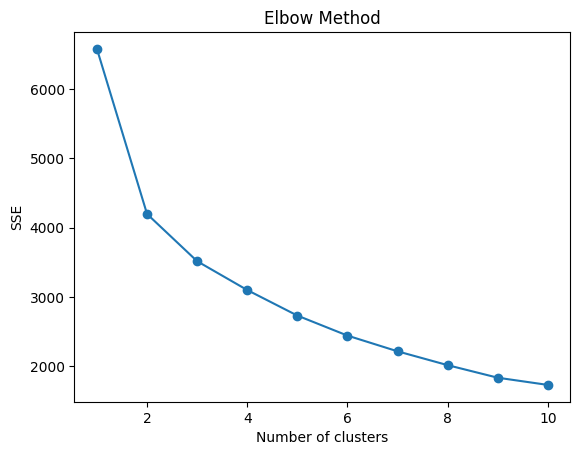

In [ ]:
# Elbow method for KMeans to find appropriate number of clusters to be determined for this data
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_clustering_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [ ]:
# now we shall apply the clustering models by creating a intialization for them.

cluster_models = {
    'KMeans': KMeans(n_clusters=3, random_state=42),
    'Hierarchical': AgglomerativeClustering(n_clusters=3)
}

In [ ]:
# Fitting and evaluating the models
cluster_results = {}

for name, model in cluster_models.items():
    cluster_labels = model.fit_predict(data_clustering_scaled)
    silhouette_avg = silhouette_score(data_clustering_scaled, cluster_labels)
    cluster_results[name] = {'Silhouette Score': silhouette_avg}
    print(f"{name} - Silhouette Score: {silhouette_avg}")

KMeans - Silhouette Score: 0.257409445632733
Hierarchical - Silhouette Score: 0.24698269059082298


Analysis of the results

1. KMeans Clustering:
  The score(0.2574) suggests that the clusters are somewhat well-defined but not very strong. The positive score indicates that samples are closer to their own clusters than to other clusters, but the low value suggests that there is still significant overlap and ambiguity between clusters. This indicates that the KMeans model has formed clusters that are only moderately separated.

2. Hierarchical Clustering:
  The score(0.2469) is slightly lower than that of the KMeans model, indicating slightly less defined clusters. This suggests that hierarchical clustering has also produced clusters that are not very distinct from each other.

Both clustering models (KMeans and Hierarchical) show low silhouette scores, indicating that neither model has produced well-separated clusters. This may be due to the nature of the data, where the data structure does not lend itself well to clear clustering


In [ ]:
# Creating Classification Labels
def classify_medv(medv):
    if medv < 20:
        return 'Low'
    elif 20 <= medv < 30:
        return 'Medium'
    else:
        return 'High'

data['classification_label'] = data['medv'].apply(classify_medv)

# Store the classification labels
classification_labels = data['classification_label'].values

# Drop the target variable for clustering analysis
data_clustering = data.drop(['medv', 'classification_label'], axis=1)

#Clustering_labels
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_clustering_scaled)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(data_clustering_scaled)

# Evaluation

# V-measure
v_measure_kmeans = v_measure_score(classification_labels, kmeans_labels)
v_measure_hierarchical = v_measure_score(classification_labels, hierarchical_labels)

# Homogeneity
homogeneity_kmeans = homogeneity_score(classification_labels, kmeans_labels)
homogeneity_hierarchical = homogeneity_score(classification_labels, hierarchical_labels)

# Completeness
completeness_kmeans = completeness_score(classification_labels, kmeans_labels)
completeness_hierarchical = completeness_score(classification_labels, hierarchical_labels)

# Print the scores
print(f"KMeans Clustering - V-Measure: {v_measure_kmeans}, Homogeneity: {homogeneity_kmeans}, Completeness: {completeness_kmeans}")
print(f"Hierarchical Clustering - V-Measure: {v_measure_hierarchical}, Homogeneity: {homogeneity_hierarchical}, Completeness: {completeness_hierarchical}")

KMeans Clustering - V-Measure: 0.17148347323391913, Homogeneity: 0.17231875226701976, Completeness: 0.17065625281843078
Hierarchical Clustering - V-Measure: 0.16531324350471624, Homogeneity: 0.16942098781657475, Completeness: 0.161399974921743


Analysis of results of comparison between Classification and Clustering Labels

1. Classification labels:

  A. Accuracy: The Decision Tree model has the highest accuracy (0.76) compared to KNN (0.63) and MLP (0.68).
  
  B. Precision, Recall, F1-Score: The Decision Tree model shows balanced precision, recall, and F1-scores across all classes, indicating its effectiveness in classification tasks. MLP has good precision and recall for the 'Medium' class but struggles with the 'Low' and 'High' classes. KNN performs poorly in the 'Low' class but better in the 'Medium' class.

2. Clustering labels:

  A. V-Measure: This metric evaluates the balance between homogeneity and completeness. Both KMeans (0.171) and Hierarchical Clustering (0.165) have low V-measure scores, indicating poor cluster quality.
  
  B. Homogeneity and Completeness: Both models have similar homogeneity and completeness scores, with KMeans performing slightly better in homogeneity (0.172) compared to Hierarchical Clustering (0.169). Completeness scores are also low for both models.